# Homework 8: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from a model that we have compiled and run in class. If you have not already done so, you will need to compile and run the `global_with_exf` verification experiment according to the steps on the handout from Lecture 8-2.

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt

Define a path to your run directory where you will store data for this exercise.

In [106]:
run_folder = '/Users/prashanthedaoo/Desktop/cs185c/MITgcm/verification/global_with_exf/run'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.


$
\
\frac{\partial T}{\partial t} = -\vec{u} \cdot \nabla T + \kappa \frac{\partial^2 T}{\partial t^2} + J_{T}
\
$



$
\frac{\partial T}{\partial t} 
$ : The change in temperature at some given location 

$
-\vec{u} \cdot \nabla T 
$ : The advected temperature term. Essentially represents the transport of heat by fluid motion. 

$
\kappa \frac{\partial^2 T}{\partial t^2}
$ : the diffusion term which represents small scale change in temperature due to small waves and currents.

$
J_{T}
$ : Represents external sources of additional energy added to the system such as radiation, sunlight, sea ice melting, etc. 


## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?



We use $\Theta$ when we want to account for adiabatic changes in temperature. We essentially remove the effect of pressure on our measured temperature, giving us a more accurate copmarison of tepmerature in our waters. 


## Part 3: Read in the data
This section will leverage the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables generated from the `global_with_exf`model. These files refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [108]:
n_rows = 40
n_cols = 90
n_depth_levels = 15

# if you ran you model according to the class directions,
# you should have these files to read in and no other
# changes are required in this cell

ADVx_TH_file = os.path.join(run_folder,'diags','ADVx_TH',' ADVx_TH.0000000690.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

ADVy_TH_file = os.path.join(run_folder,'diags','ADVy_TH', ' ADVy_TH.0000000690.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFxE_TH_file = os.path.join(run_folder,'diags','DFxE_TH', ' DFxE_TH.0000000690.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFyE_TH_file = os.path.join(run_folder,'diags','DFyE_TH', ' DFyE_TH.0000000690.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

Subset the variables to the first depth level ($k=0$):

In [109]:
ADVx_TH = np.array(ADVx_TH[0,:,:])
ADVy_TH = np.array(ADVy_TH[0,:,:])
DFxE_TH = np.array(DFxE_TH[0,:,:])
DFyE_TH = np.array(DFyE_TH[0,:,:])
XC = np.array(XC[:,:])
YC = np.array(YC[:,:])

## Part 4: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

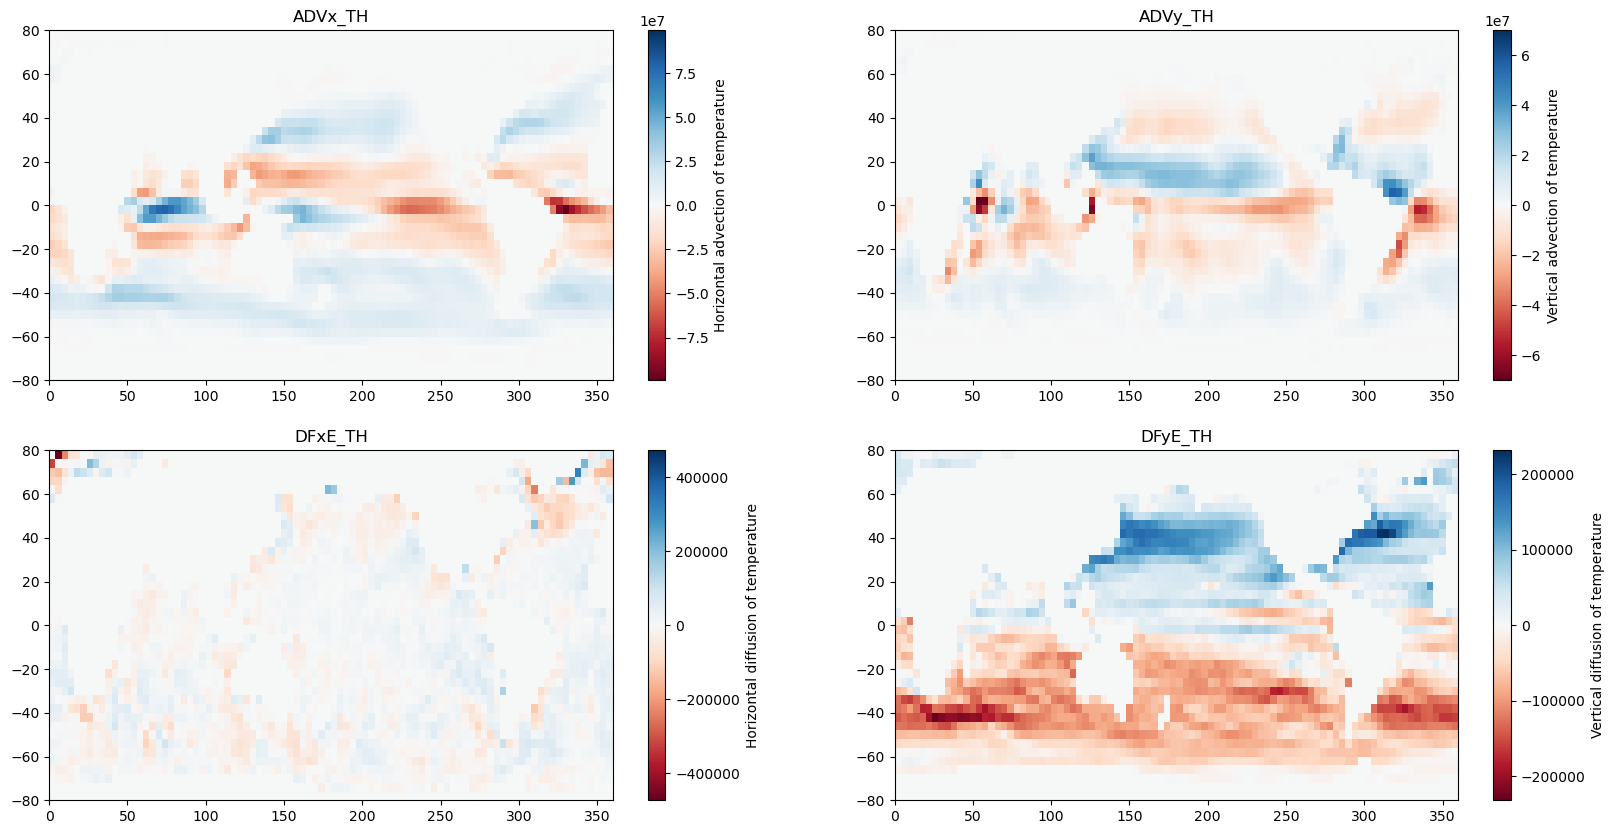

In [116]:
# enter code for your plot here


fig, axs = plt.subplots(2, 2, figsize=(20, 10))
im0 = axs[0, 0].pcolormesh(XC, YC, ADVx_TH, vmin=np.min(ADVx_TH), vmax = -np.min(ADVx_TH),cmap='RdBu')
axs[0, 0].set_title('ADVx_TH')
plt.colorbar(im0, ax=axs[0, 0], label="Horizontal advection of temperature")


# enter code for your plot here


im1 = axs[0, 1].pcolormesh(XC, YC, ADVy_TH, vmin=np.min(ADVy_TH), vmax = -np.min(ADVy_TH), cmap='RdBu')
axs[0, 1].set_title('ADVy_TH')
plt.colorbar(im1, ax=axs[0, 1],label="Vertical advection of temperature")

# enter code for your plot here

im2 = axs[1, 0].pcolormesh(XC, YC, DFxE_TH, vmin=np.min(DFxE_TH), vmax = -np.min(DFxE_TH), cmap='RdBu')
axs[1, 0].set_title('DFxE_TH')
plt.colorbar(im2, ax=axs[1, 0],label="Horizontal diffusion of temperature")

# enter code for your plot here

im3 = axs[1, 1].pcolormesh(XC, YC, DFyE_TH, vmin=np.min(DFyE_TH), vmax = -np.min(DFyE_TH), cmap='RdBu')
axs[1, 1].set_title('DFyE_TH')
plt.colorbar(im3, ax=axs[1, 1],label="Vertical diffusion of temperature")

plt.show()


## Part 5: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [75]:
# conduct your calculation here
ADv_mag = np.sqrt(ADVx_TH**2 + ADVy_TH**2)
DF_mag = np.sqrt(DFxE_TH**2 + DFyE_TH**2)


Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

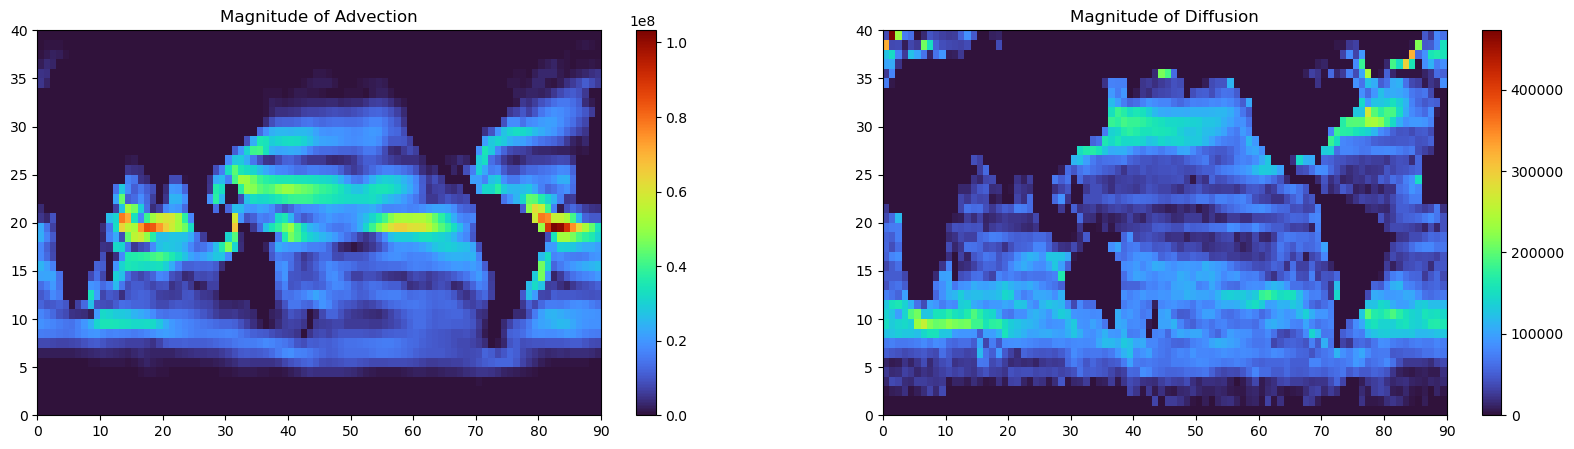

In [78]:
# enter code for your plot here

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

im_adv = ax[0].pcolormesh(ADv_mag, cmap='turbo')
ax[0].set_title('Magnitude of Advection')
plt.colorbar(im_adv, ax=ax[0])

imdiff = ax[1].pcolormesh(DF_mag, cmap='turbo')
ax[1].set_title('Magnitude of Diffusion')
plt.colorbar(imdiff, ax=ax[1])

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [111]:
# conduct your calculation here

avoiding_land = (ADv_mag != 0) & (DF_mag != 0)
ratio = ADv_mag[avoiding_land]/DF_mag[avoiding_land]
print(ratio.mean())

348.73425


## Part 6: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?


From the magnitudes, the diffusion term seems to have the much lower magnitude than the advection term. Due of this, we could remove the diffusion term from our model to save computation costs. But we will have to deal with a fully advective model which does not factor in small scale movements in temperature. In the heat equation, you would remove the κ∇^2 * T term